https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/notebook 

<h1><center>R square And P Value image </center></h1>
<h2><center>Understanding the importance of R square and p-value in linear regression</center></h2>
<center><img src="../images/r_sq.gif" align="center"/></center>

![title](../images/r_sq.gif "ShowMyImage")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

In [4]:
df = pd.read_csv('../datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The target variable = charges, remaining are independent variables.

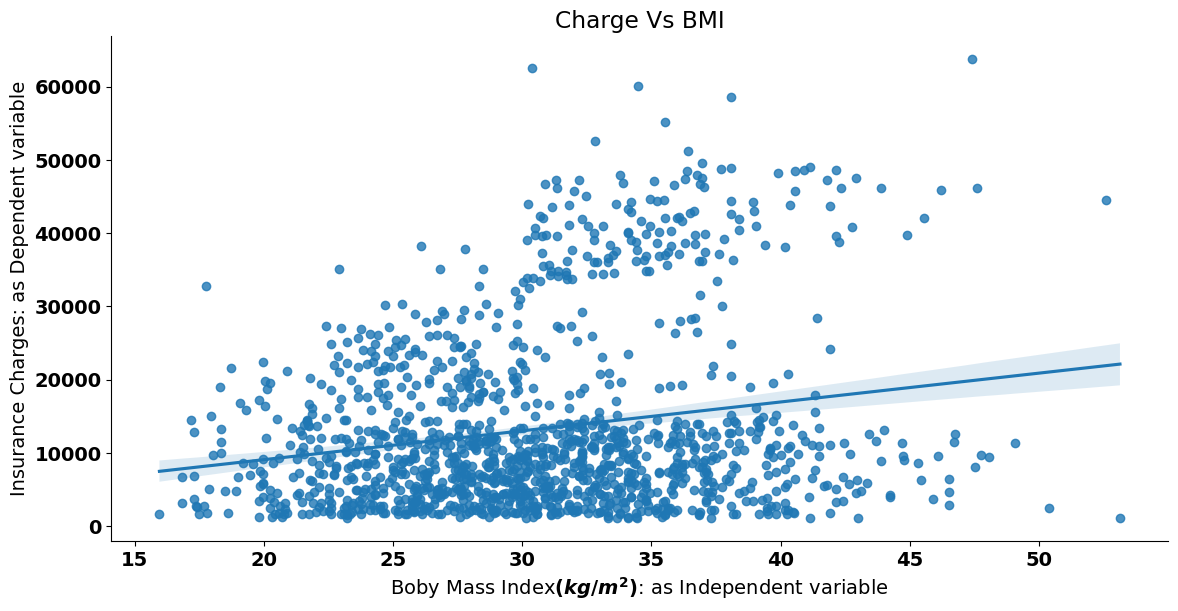

In [5]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


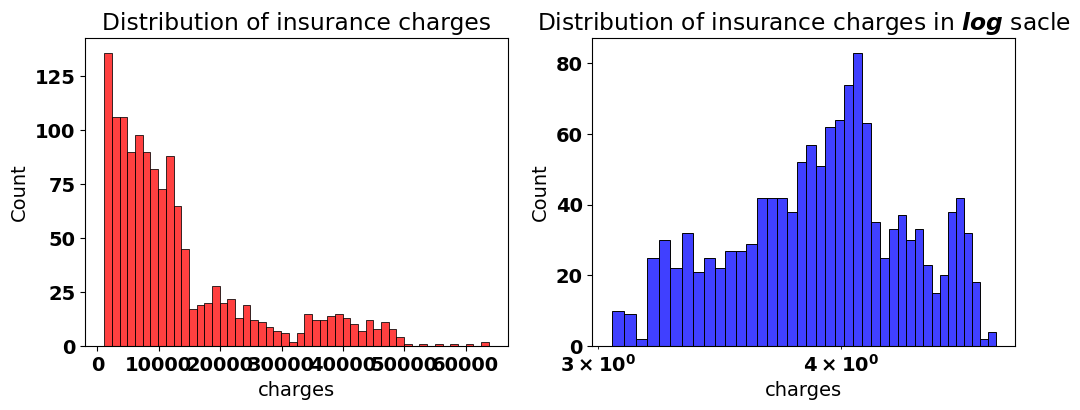

In [10]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

if we look at the left plot the target varies from 1k to 63k, the plot is right skewed. apply a natural log and it tends to normal in the right

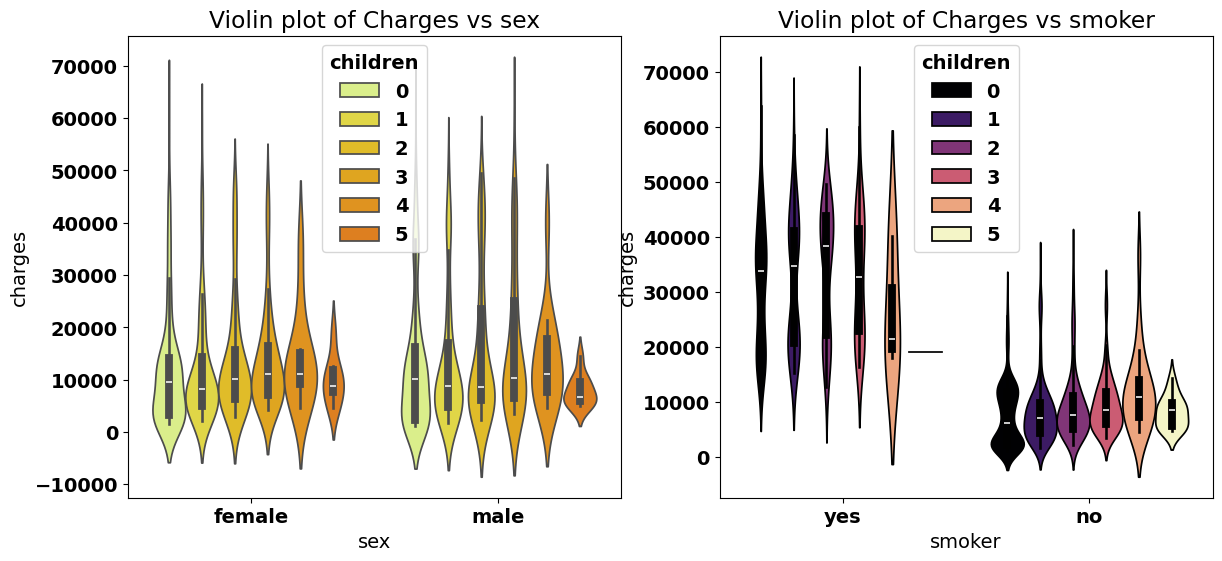

In [11]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',hue='children',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,hue='children',palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

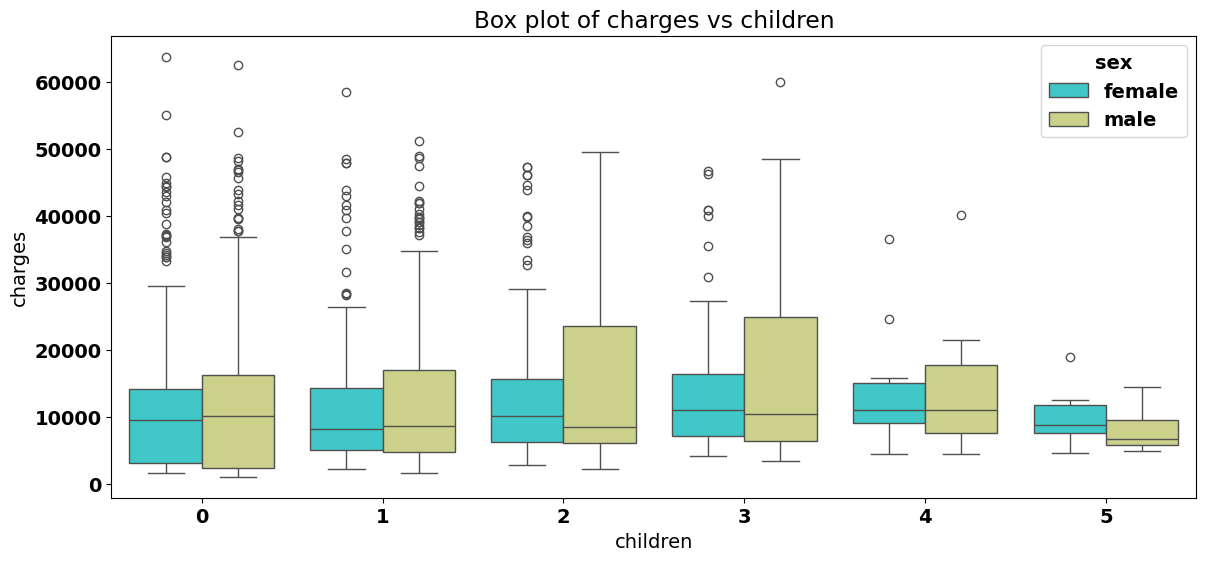

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [23]:
#USe chatgpt for interpretation

In [14]:
df.groupby('children').agg(['min','max'])['charges']

,min,max
children,,
0,1121.8739,63770.42801
1,1711.0268,58571.07448
2,2304.0022,49577.66240
3,3443.0640,60021.39897
4,4504.6624,40182.24600
5,4687.7970,19023.26000


### Label encoding

In [15]:
categorical_cols = ['sex', 'children','smoker','region']
df_encode = pd.get_dummies(data=df, prefix='OHE', prefix_sep='_',columns=categorical_cols,drop_first=True,dtype='int8')
df_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [16]:
df_encode.columns.values

array(['age', 'bmi', 'charges', 'OHE_male', 'OHE_1', 'OHE_2', 'OHE_3',
       'OHE_4', 'OHE_5', 'OHE_yes', 'OHE_northwest', 'OHE_southeast',
       'OHE_southwest'], dtype=object)

In [17]:
#Box-Cox transformation
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.011402906172930048, 0.09880968597671798),
 np.float64(0.043649061187374535))

In [18]:
df_encode.charges = np.log(df_encode.charges)
df_encode.charges.describe()

count    1338.000000
mean        9.098659
std         0.919527
min         7.022756
25%         8.463853
50%         9.146552
75%         9.719558
max        11.063045
Name: charges, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x = df_encode.drop('charges',axis=1)
y = df_encode['charges']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=23)

In [22]:
X_train.head()

,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
923,34,35.815,1,0,0,0,0,0,0,1,0,0
1121,46,38.170,1,0,1,0,0,0,0,0,1,0
713,20,40.470,1,0,0,0,0,0,0,0,0,0
552,62,21.400,1,0,0,0,0,0,0,0,0,1
738,23,31.730,1,0,0,1,0,0,1,0,0,0
